# **Web scraping using beautifulsoup**

In this tutorial we will develop a web scraper to extract online review data from an online review site.

## Load libraries

For this scaper we will use beautifulsoup and requests python packages. Both the packages comes pre-installed with Google Colab, however, if you are using your own environment, you would need to install the both.

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

## Design the scraper

Specify the URL you need to scrape data from.
The following commands will fetch the web structure of the url and assign it to the object 'soup' which we can use to extract data.

In [2]:
url = 'https://www.productreview.com.au/listings/nab-national-australia-bank'

In [3]:
page = requests.get(url)
soup = BeautifulSoup(page.text, "html.parser")

## **Scraping data from html elements**

We need to extract the reviews from this page. 

First, find the corresponding html element which contains reviews. 
Visit the website, right click -> Inspect element -> identify the html element name which contains the review. (Use Google Chrome or Firefox)

The command **findAll**  will find all the elements with the given name. In this case, it will fetch all the div elements with the id names starting with **review-** in the **id** attribute.

How it looks on browser as follows:

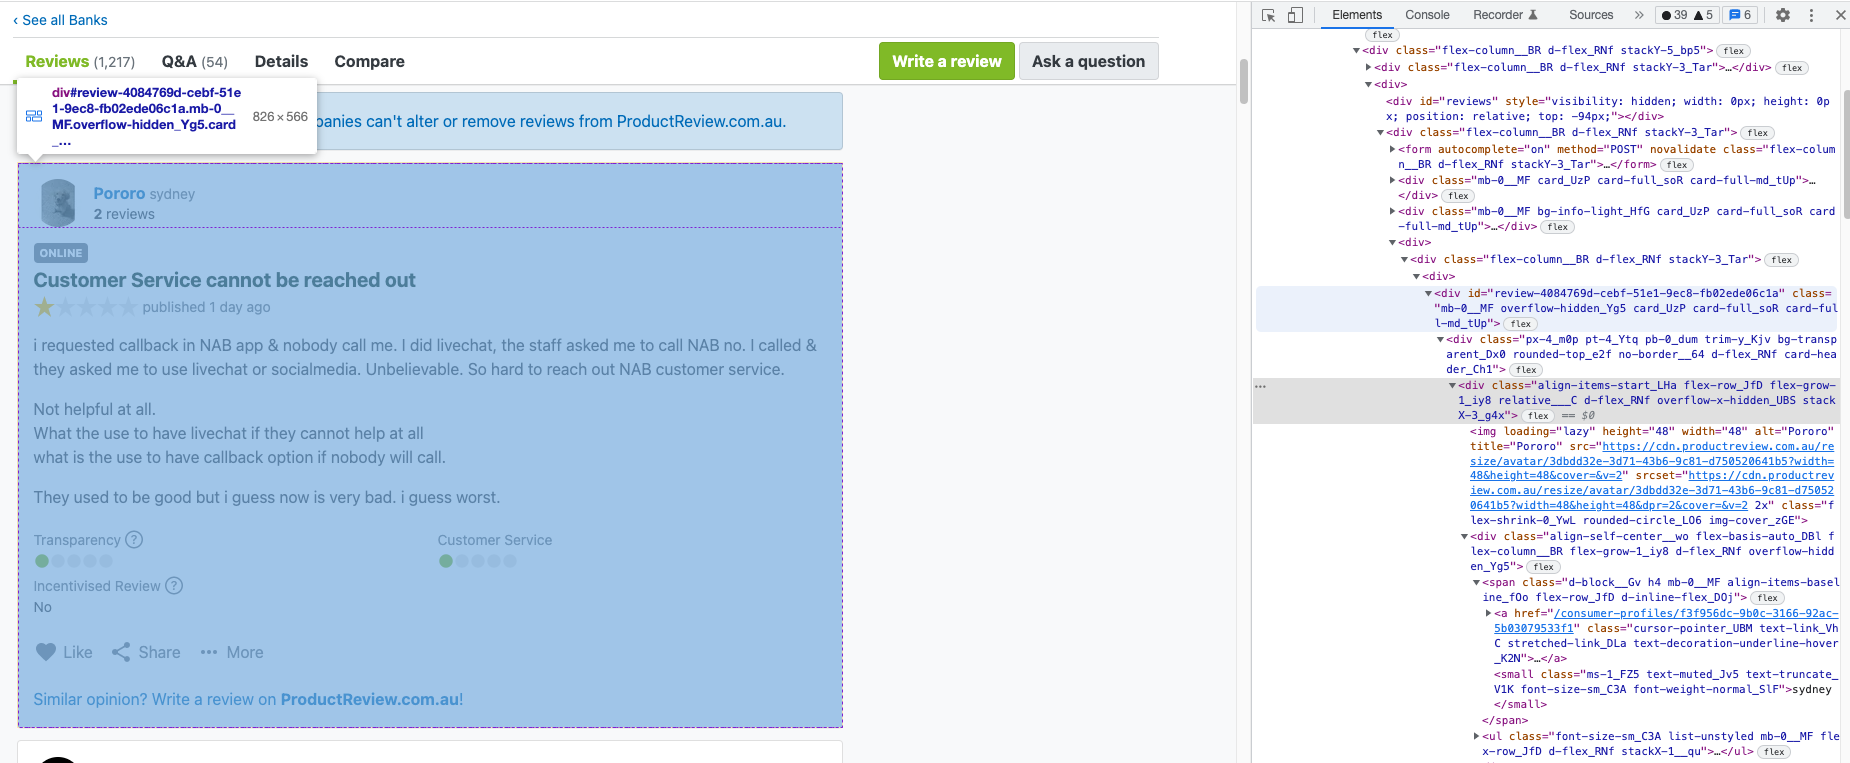

In [4]:
all_reviews = soup.findAll("div",id=lambda x: x and x.startswith('review-'))

In [5]:
print('Length of reviews: {}'.format(len(all_reviews)))

Length of reviews: 15


Observe the structure of one element.

In [6]:
print(all_reviews[-1])

<div class="_5AtTC bsTovP x3KQVA _rapVl _j9rXY" id="review-b5954c13-8815-5ef7-b03e-f0c32267f463"><div class="_dsC1P pFuRoE ZQYKGF _qrrau I_5gcD yPUntS ML0Rwb R7nZMt dKgQNF klzKLe"><div class="DZHfyq _5fnKp eOxf0s J8mkhe m94ume _qrrau G_HmLM"><div class="Q_md3f eOxf0s YNfOGu"><svg class="D1KY8n" height="20" viewbox="0 0 20 20" width="20"><use xlink:href="/static/icons.svg?hash=9471008dabb591989592c689fd82d17df107700c#badge-google"></use></svg><img alt="Scott T." class="_E3NrB ntIxGI" height="40" loading="lazy" src="https://cdn.productreview.com.au/resize/avatar/4f910841-917c-394b-a449-fcfe34f916e7?cover=&amp;height=40&amp;v=2&amp;width=40" srcset="https://cdn.productreview.com.au/resize/avatar/4f910841-917c-394b-a449-fcfe34f916e7?cover=&amp;dpr=2&amp;height=40&amp;v=2&amp;width=40 2x" title="Scott T." width="40"/></div><div class="J8mkhe QHl__5 w0hDMo m94ume"><span class="h5 ho_Ash EqS9aA _qrrau SLE7Kt"><a class="prK_Ki alhypY cIE6XR ZrFypu lqZqRf" href="/consumer-profiles/05cd6db8-d7f8

Now we need to iterate over the **all_reviews** object and process each element.  
Identify the html elements corresponding to:

*   Title
*   Review text
*   Date
*   Star rating


**Note:** Certain values are placed as 'attributes' of a html component. In such scenarios, you have to access the value using a different syntax (Observe the codes for accessing date and review rating)

In [14]:
all_reviews[0].find('h3',{"data-layout":"title"}).text

'Really an email that says click here to opt in'

In [17]:
reviews = []

for reviewBox in all_reviews:

    # get review title
    review_title = reviewBox.find('h3',{"data-layout":"title"}).text
    
    # get review
    txt = reviewBox.find('div',{"itemprop":"reviewBody"})
    review_text =  " ".join([t.text for t in txt.findAll('p')])
    
    # get date
    # date is placed as an attribute of the html element. These are indicated by the word 'attr' in the html structure. You can access them as follows:
    review_date = reviewBox.find("time").attrs['datetime']

    # get star rating
    review_stars = reviewBox.find('div', {'class': 'qUqvo4'}).attrs['title']
    
    # append the process review and the title to the reviews list
    reviews.append([review_title, review_text, review_date, review_stars])

Explore the extracted reviews.

In [18]:
len(reviews)

15

In [19]:
reviews

[['Really an email that says click here to opt in',
  'I received an email yesterday regarding a Fly Buy points give away. As much as I love they are offering this , why would a bank have a opt in link with all the scams going round. why not just enter all because some people who click this legitimate will click the next email which maybe a scam email .',
  '2023-03-31T07:06:44.000Z',
  '1 out of 5 stars'],
 ['CUSTOMER SERVICE PATHETIC',
  "I have been with this bank for a very long time and recently have had the worse experience with the fraud team. When you call up you are left on hold for hours, ie 1hr and 30mins, and at times for 50mins at a time, no apology for the long wait, nothing is resolved and you can't speak to anyone as they put you on hold and you could be on hold for hours, with no resolution.  I have had fraulent transactions on my account and when i questioned it to the customer service who answered she said you can't always know if it is a fraud transaction. When",
  

Compose a dataframe using the review data.

In [20]:
output_column_names = ['title', 'review', 'date', 'stars']
data = pd.DataFrame(reviews, columns=output_column_names)

In [ ]:
data.head()

,title,review,date,stars
0,Customer Service cannot be reached out,i requested callback in NAB app & nobody call ...,2022-04-01T22:35:09.000Z,1 out of 5 stars
1,"Always been great, business banking is next level",Dropped Commbank for stupid fees. NAB don't ch...,2022-04-01T08:49:08.000Z,5 out of 5 stars
2,"""come back Monday!""","Had a term deposit due on a Monday, couldn't g...",2022-03-30T07:14:55.000Z,1 out of 5 stars
3,this is screwed.,"this is the 2nd time nab has done this, they s...",2022-03-29T08:55:50.000Z,1 out of 5 stars
4,Inconvenient & very disappointing!,I’m very disappointed that they have a coin de...,2022-03-29T01:11:14.000Z,1 out of 5 stars


Write the dataframe to a csv. The dataframe will be saved in Files tab.

In [ ]:
data.to_csv('nab_reviews.csv', index=None)